<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/ReadCleanExploreDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn

import pandas as pd
import numpy as np

import datetime

In [3]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

automobile_df = pd.read_csv(io.BytesIO(uploaded['cars.csv']))

Saving cars.csv to cars.csv


In [4]:
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [5]:
automobile_df.shape

(394, 12)

In [6]:
automobile_df.describe()

,MPG,Horsepower,bore,stroke
count,385.000000,394.000000,394.000000,394.000000
mean,23.551429,104.337563,3.305025,3.289289
std,7.821598,38.449600,0.270336,0.271165
min,9.000000,46.000000,2.540000,2.070000
25%,17.500000,75.000000,3.080000,3.150000
50%,23.000000,92.500000,3.270000,3.350000
75%,29.000000,125.000000,3.580000,3.400000
max,46.600000,230.000000,3.940000,4.170000


In [7]:
# Replacing '?' with nan values.
# As pandas has number of useful function that work with data type 'nan'. 
automobile_df = automobile_df.replace('?', np.nan)
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [8]:
# To check missing values
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [9]:
# Filling all missing values in the column 'MPG' with the Mean of the column 'MPG'.
automobile_df['MPG'] = automobile_df['MPG'].fillna(automobile_df['MPG'].mean())
automobile_df.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [10]:
automobile_df.isna().sum()

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [0]:
# Dropping records with fields missing
# If there are few records with missing values
# Valid only if you have sufficient data for you analysis
automobile_df = automobile_df.dropna()

In [12]:
automobile_df.shape

(387, 12)

In [0]:
# Dropping a particular column (if column is not needed)
automobile_df.drop('Model', inplace = True, axis = 1)

In [14]:
automobile_df.shape

(387, 11)

In [15]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
343,37.0,4,85,65,1975,19.4,1981,Japan,3.63,4.17,8.1
323,44.3,4,90,48,2085,21.7,1980,Europe,3.34,3.46,8.5
348,29.9,4,98,65,2380,20.7,1981,US,3.03,3.15,9
74,14.0,8,318,150,4077,14,1972,US,3.80,3.35,8
194,24.5,4,98,60,2164,22.1,1976,US,3.78,3.15,9.5


In [0]:
# Dropping other few column
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], inplace = True, axis = 1)

In [17]:
automobile_df.shape

(387, 8)

In [18]:
automobile_df.head(5)

# We will have to clean the 'Year' and 'Origin' column

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [19]:
# To check how many values in the column 'Year' is numeric or non numeric
automobile_df['Year'].str.isnumeric().value_counts()

# We have 351 numeric values and 36 non numeric values.
# Useful information to clear the 'Year' Column.

True     351
False     36
Name: Year, dtype: int64

In [20]:
# To see all the non numeric value in the column 'Year'
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

# We can see the data type is object

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [21]:
# We can extract only the first 4 characters to get the 'Year' information
# We can do it using regular expression
Year_extract = automobile_df['Year'].str.extract(r'^(\d{4})', expand = False)
Year_extract.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [22]:
# To check missing values in 'Year' column
automobile_df['Year'].isnull().sum()

0

In [23]:
#automobile_df['Year'] = Year_extract
# Or use to_numeric to convert the dtype to numeric
automobile_df['Year'] = pd.to_numeric(Year_extract)
automobile_df
# Now the column 'Year' is cleaned

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970,"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970,US]
6,14.000000,8,454,220,4354,9,1970,"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US
...,...,...,...,...,...,...,...,...
389,27.000000,4,140,86,2790,15.6,1982,US
390,44.000000,4,97,52,2130,24.6,1982,Europe
391,32.000000,4,135,84,2295,11.6,1982,US
392,28.000000,4,120,79,2625,18.6,1982,US


In [24]:
automobile_df['Year'].dtype

dtype('int64')

In [25]:
# We can add a new feature called 'Age' of the car as age of the car may effect the mileage of the car.
# Age = Current year - Value in Year column
automobile_df['Age'] = int(datetime.datetime.now().year) - automobile_df['Year']
automobile_df['Age'].head(10)

0     50
3     50
4     50
6     50
7     50
8     50
9     50
10    50
11    50
12    50
Name: Age, dtype: int64

In [26]:
automobile_df['Age'].sample(10)

194    44
289    41
183    44
141    46
113    47
237    43
308    40
131    46
98     47
160    45
Name: Age, dtype: int64

In [0]:
# Dropping 'Year' Column
automobile_df.drop('Year', inplace=True, axis = 1)

In [28]:
automobile_df.sample(10)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
282,20.6,6,225,110,3360,16.6,US,41
355,28.1,4,141,80,3230,20.4,Europe,39
183,26.0,4,98,79,2255,17.7,US,44
333,32.4,4,107,72,2290,17,Japan,40
386,32.0,4,144,96,2665,13.9,Japan,38
72,13.0,8,307,130,4098,14,US,48
23,26.0,4,121,113,2234,12.5,Europe,50
257,20.8,6,200,85,3070,16.7,US,42
116,29.0,4,68,49,1867,19.5,Europe,47
368,27.0,4,151,90,2735,18,US,38


In [29]:
# To check if the data requires further cleaning, we will check the data types
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [30]:
# The above columns like 'Cylinders', 'Weight' etc should have been numeric.
# If not, then there might be some further cleaning required.
# Lets start with the 'Cylinders' column.

automobile_df['Cylinders'].isnull().sum()

# We saw that there are no missing values

0

In [31]:
# We will now check the numeric and non numberic value in the column 'Cylinders'.
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [32]:
# To see all the non numeric value in the column 'Cylinders'
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

# Another representation of missing values

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [33]:
# We will extract all the numeric values and calculate the mean of the column 'Cylinders'
# Then we will replace the missing values / dash by the mean value
cylinders_no_nissing_value = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']
cylinders_no_nissing_value

0      8
3      8
4      8
6      8
7      8
      ..
389    4
390    4
391    4
392    4
393    4
Name: Cylinders, Length: 378, dtype: object

In [34]:
# Converting the values to integers and then calculating the mean.
cylinders_mean = cylinders_no_nissing_value.astype(int).mean()
cylinders_mean

5.420634920634921

In [0]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cylinders_mean).astype(int)

In [36]:
automobile_df.dtypes
# Cylinders is not of type 'int'

MPG             float64
Cylinders         int64
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [0]:
# Now lets clean the 'Displacement' column.
# converting it to float type.

# Displacement should be a numeric field and not an object, so we will use the pd.to_numeric function in order to coerce displacement 
# to be a number. Errors is equal to coerce. We'll convert invalid numeric values to NaNs, or not a number.

automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors = 'coerce')

In [38]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [0]:
# Converting the Weight column to numeric
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors = 'coerce')

In [40]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration     object
Origin           object
Age               int64
dtype: object

In [41]:
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors = 'coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [42]:
# Cleaning the column 'Origin'
automobile_df['Origin'].head(10)

0     US; Detroit, Michigan
3                        US
4                       US]
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
Name: Origin, dtype: object

In [43]:
# To get all the unique values
automobile_df['Origin'].unique()

# Now we saw that the origin can be either 'US', 'Europe', and 'Japan'
# We will remove the cities and pick only countries

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [44]:
# Now we will replace the string which contains 'US' with 'US' or else we will leave the string as is
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'), 'US', automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [45]:
# Repeating the above step for Japan
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'), 'Japan', automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe-Germany', 'Europe', 'Europe Germany'],
      dtype=object)

In [46]:
# Repeating the above step for Europe
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'), 'Europe', automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [47]:
automobile_df.shape

(387, 8)

In [48]:
automobile_df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [49]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


Visualizing Relationships

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Miles per gallon')

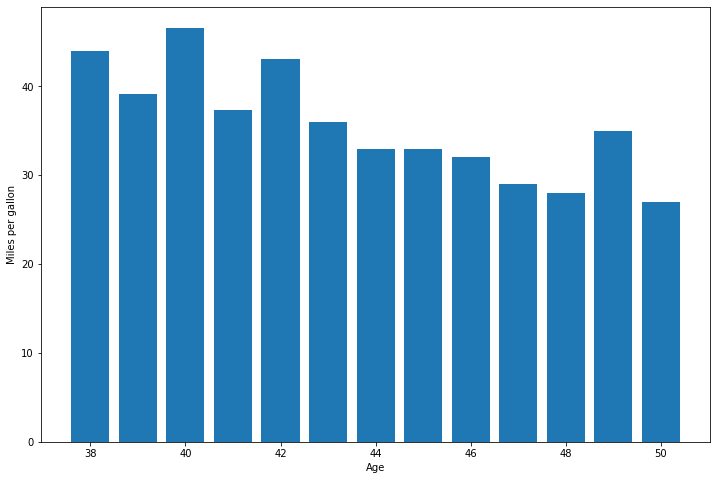

In [52]:
plt.figure(figsize = (12,8))
plt.bar(automobile_df['Age'], automobile_df['MPG'])

plt.xlabel('Age')
plt.ylabel('Miles per gallon')

# We can see that for older cars, mile per gallon is low.

Text(0, 0.5, 'Miles per gallon')

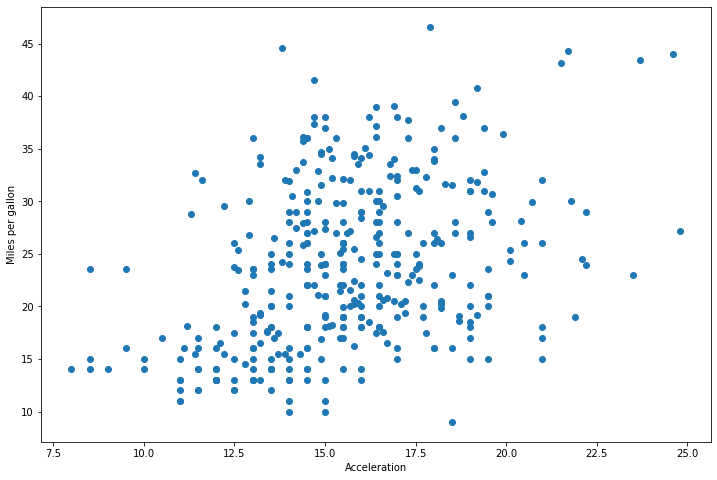

In [53]:
plt.figure(figsize = (12,8))
plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'])

plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

# We can see that there exists a linear relationship.
# Car with higher acceleration seems to have a better mileage.

Text(0, 0.5, 'Miles per gallon')

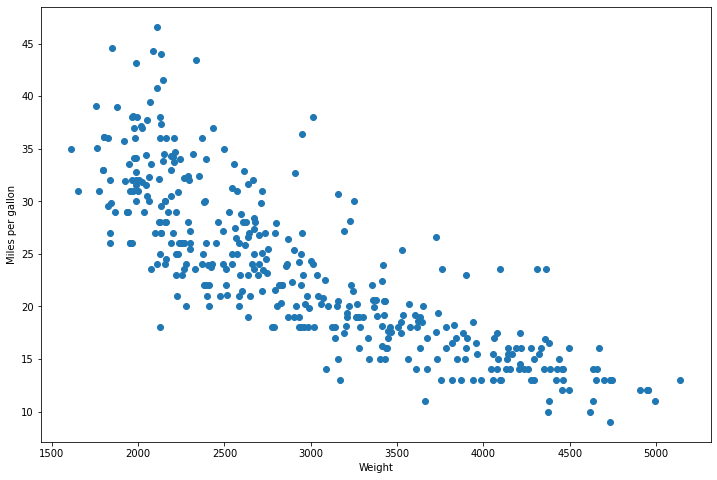

In [54]:
# To check is weight of the car effects the mileage?
plt.figure(figsize = (12,8))
plt.scatter(automobile_df['Weight'], automobile_df['MPG'])

plt.xlabel('Weight')
plt.ylabel('Miles per gallon')

# We can see a negative relationship.
# Cars with higher weight has less mileage. 

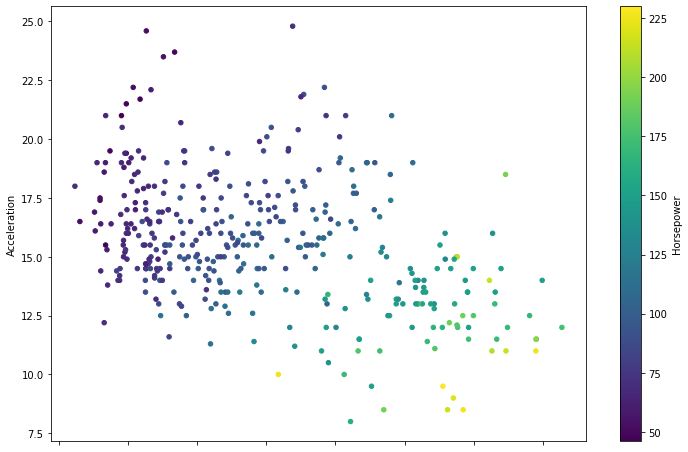

In [66]:
# Scatter plot for 3 variables (3 dimensions)
# To visualize bivariate relationships

automobile_df.plot.scatter(x = 'Weight', y = 'Acceleration', c = 'Horsepower', colormap = 'viridis', figsize = (12,8))

# Car with higher weight have low acceleration.
# Car with higher weight and lower acceleration have higher horsepower.

Text(0, 0.5, 'Miles per gallon')

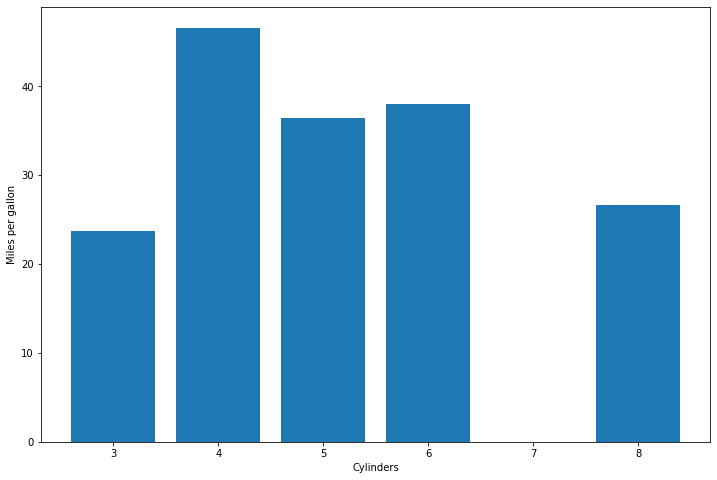

In [67]:
plt.figure(figsize = (12,8))
plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])

plt.xlabel('Cylinders')
plt.ylabel('Miles per gallon')

# Hard to see the exact pattern

In [68]:
# Dropping 2 columns as they have discrete values and not continours numeric values.
automobile_df.drop(['Cylinders', 'Origin'], inplace=True, axis = 1)
automobile_df.sample(5)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
287,16.9,350.0,155,4360,14.9,41
255,19.4,232.0,90,3210,17.2,42
117,24.0,116.0,75,2158,15.5,47
317,31.3,120.0,75,2542,17.5,40
23,26.0,121.0,113,2234,12.5,50


In [69]:
# Viewing inter relationships in our data using correlation matrix.
car_corr = automobile_df.corr()
car_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


In [70]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


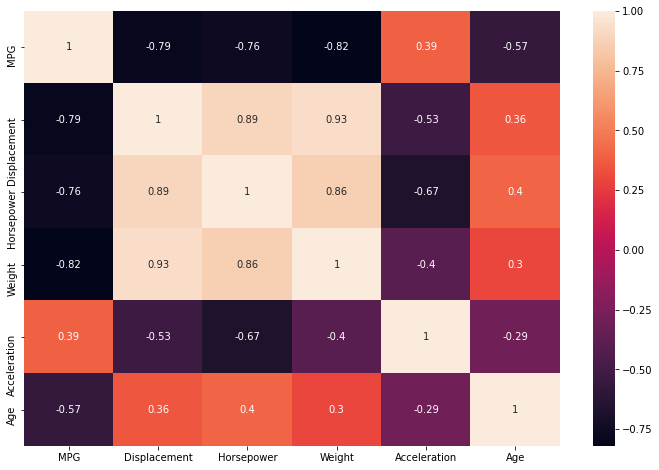

In [71]:
fig, ax = plt.subplots(figsize = (12,8))
sns.heatmap(car_corr, annot = True)